In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

# Task
Analyze the "Heart Disease" dataset from the UCI Machine Learning Repository to predict heart disease using Logistic Regression. The target variable is 'num', which should be converted to a binary variable (0 for no disease, 1 for disease). Handle missing values, split the data into training and testing sets, train a Logistic Regression model, and evaluate its performance using accuracy, precision, recall, and F1-score.

## Handle missing values

### Subtask:
Identify and handle missing values in the features (`X`) and target (`y`) dataframes.


**Reasoning**:
Check for missing values in both the features and target dataframes to understand the extent of missing data.



In [3]:
print("Missing values in X:")
print(X.isnull().sum())
print("\nMissing values in y:")
print(y.isnull().sum())

Missing values in X:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64

Missing values in y:
num    0
dtype: int64


**Reasoning**:
Since there are only a few missing values in the 'ca' and 'thal' columns of the feature DataFrame X, and no missing values in the target DataFrame y, dropping the rows with missing values in X is a reasonable strategy to handle them without significant data loss.



In [4]:
X = X.dropna()
y = y.loc[X.index] # Keep only the corresponding rows in y
print("Missing values in X after handling:")
print(X.isnull().sum())
print("\nMissing values in y after handling:")
print(y.isnull().sum())

Missing values in X after handling:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

Missing values in y after handling:
num    0
dtype: int64


## Convert target to binary

### Subtask:
The target variable `num` has values from 0 to 4. Convert it to a binary variable where 0 indicates no heart disease and 1 indicates the presence of heart disease (values 1, 2, 3, or 4).


**Reasoning**:
Convert the target variable 'num' to a binary variable (0 or 1) and then verify the conversion by printing the value counts.



In [5]:
y['num'] = y['num'].apply(lambda x: 1 if x > 0 else 0)
print("Value counts of the binary target variable:")
print(y['num'].value_counts())

Value counts of the binary target variable:
num
0    160
1    137
Name: count, dtype: int64


## Split data

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Import the necessary function for splitting the data and then split the data into training and testing sets.



In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (222, 13)
Shape of X_test: (75, 13)
Shape of y_train: (222, 1)
Shape of y_test: (75, 1)


## Train logistic regression model

### Subtask:
Train a Logistic Regression model on the training data.


**Reasoning**:
Import LogisticRegression, instantiate the model, and fit it to the training data.



In [7]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence
model.fit(X_train, y_train.values.ravel())

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

## Evaluate model

### Subtask:
Evaluate the trained model on the testing data using appropriate metrics like accuracy, precision, recall, and F1-score.


**Reasoning**:
Import necessary evaluation metrics and calculate them using the test set and predictions.



In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.8933
Precision: 0.8788
Recall: 0.8788
F1-score: 0.8788


## Summary:

### Data Analysis Key Findings

*   Missing values were found in the 'ca' (4 missing) and 'thal' (2 missing) columns of the feature dataframe `X`. These rows were dropped, resulting in 297 complete instances for analysis.
*   The target variable `num`, originally ranging from 0 to 4, was successfully converted to a binary variable (0 for no disease, 1 for disease). The resulting binary target distribution showed 160 instances of no heart disease and 137 instances of heart disease.
*   The data was split into training (75% or 222 instances) and testing (25% or 75 instances) sets with a random state of 42.
*   A Logistic Regression model was trained on the training data. A convergence warning was noted, suggesting that increasing `max_iter` or scaling the data could potentially improve the model training process.
*   The trained Logistic Regression model achieved an accuracy of approximately 89.33% on the test set.
*   The precision, recall, and F1-score of the model on the test set were all approximately 87.88%.

### Insights or Next Steps

*   Investigate the convergence warning by increasing `max_iter` for the Logistic Regression model or by scaling the feature data to potentially improve model performance.
*   Explore other classification models and compare their performance metrics (accuracy, precision, recall, F1-score) to the Logistic Regression model to identify the best model for predicting heart disease for this dataset.


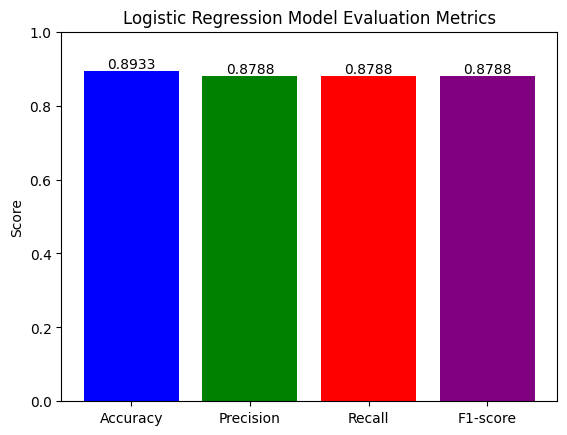

In [9]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

fig, ax = plt.subplots()
bars = ax.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])

# Add the values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', ha='center', va='bottom')

plt.ylabel('Score')
plt.title('Logistic Regression Model Evaluation Metrics')
plt.ylim(0, 1)
plt.show()